<a href="https://colab.research.google.com/github/sawantdayanand8/Machine-learning/blob/main/Banking_data_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

 **READING CSV FILE**

In [ ]:
data= pd.read_csv("Banking Dataset.csv")

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

**This data contains 134474 Rows and 17 Columns**

In [ ]:
data.shape

(32950, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**Check data types of all columns***

In [ ]:
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

**Check missing data**

In [ ]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

**Check for class imbalance**

In [ ]:
data["y"].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

Text(0.5, 1.0, 'target variable')

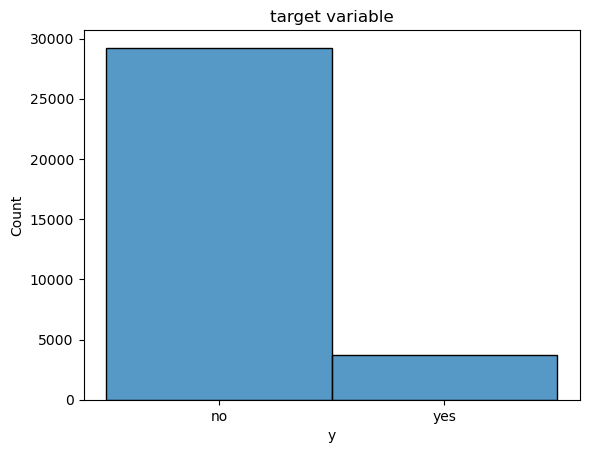

In [ ]:
sns.histplot(data["y"])
plt.title("target variable")

**Percentage of class present in target variable(y)**

In [ ]:
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)


percentage of NO and YES
 no     88.734446
yes    11.265554
Name: y, dtype: float64


**Exploratory Data Analysis**

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


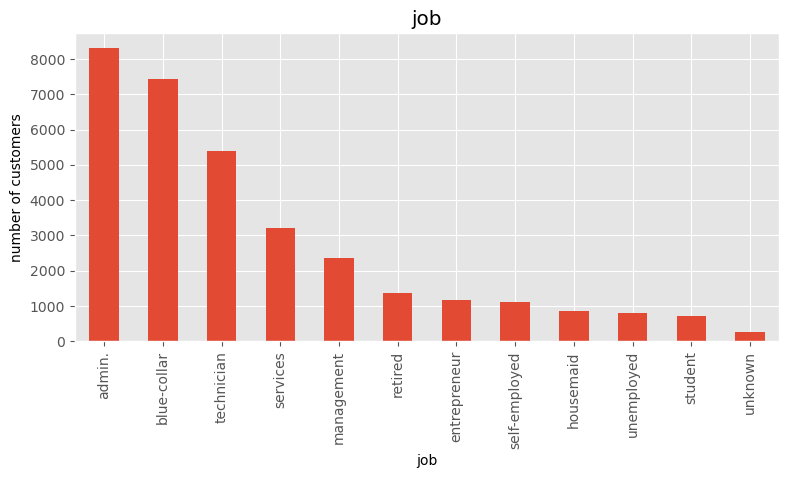

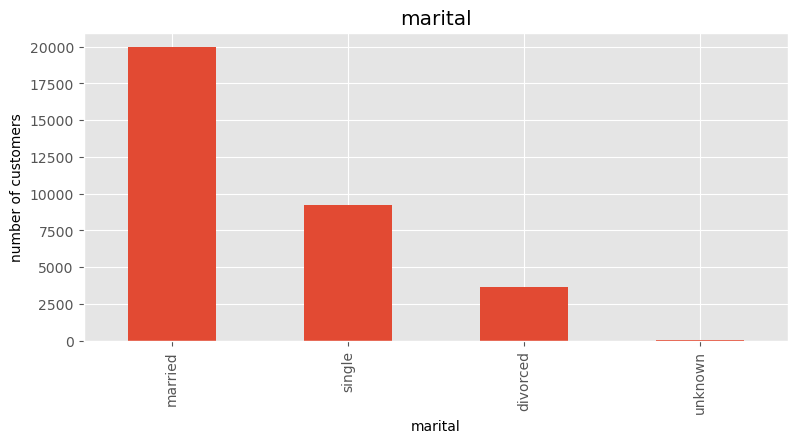

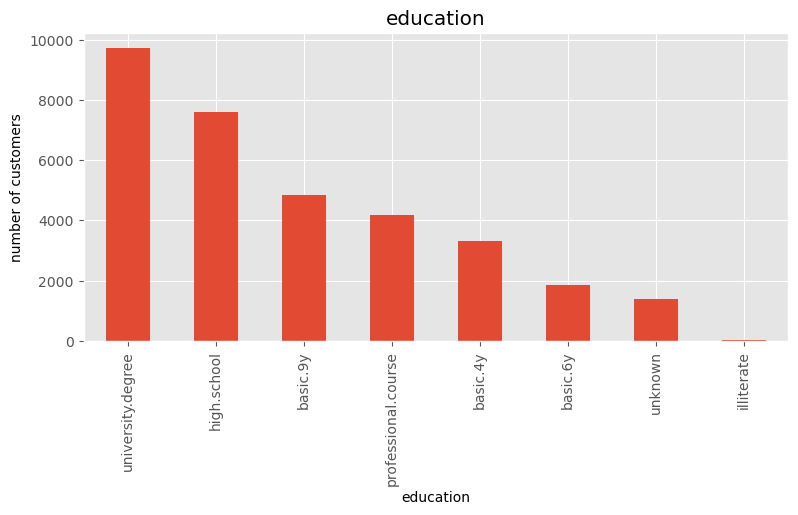

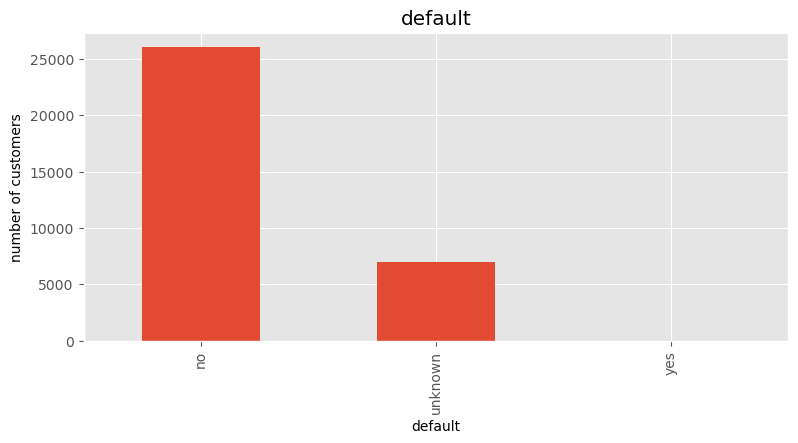

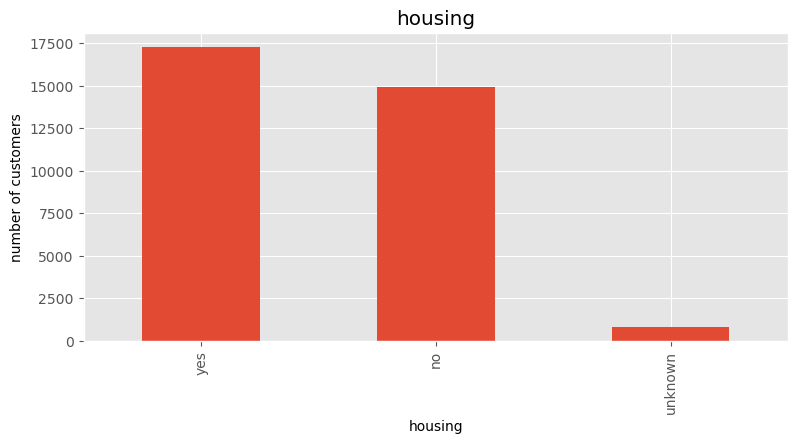

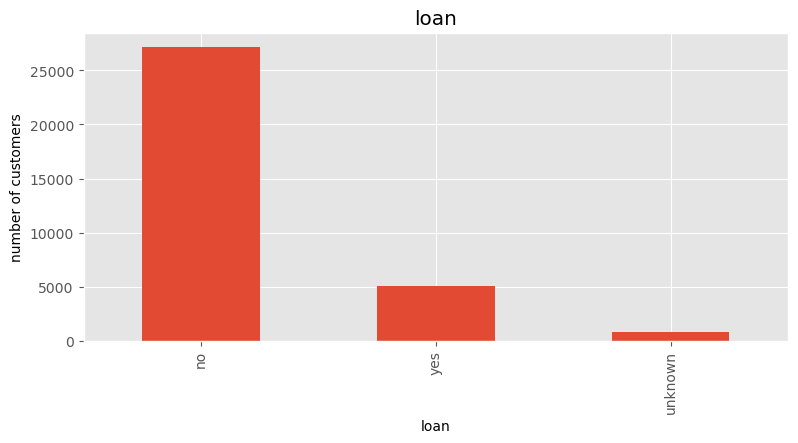

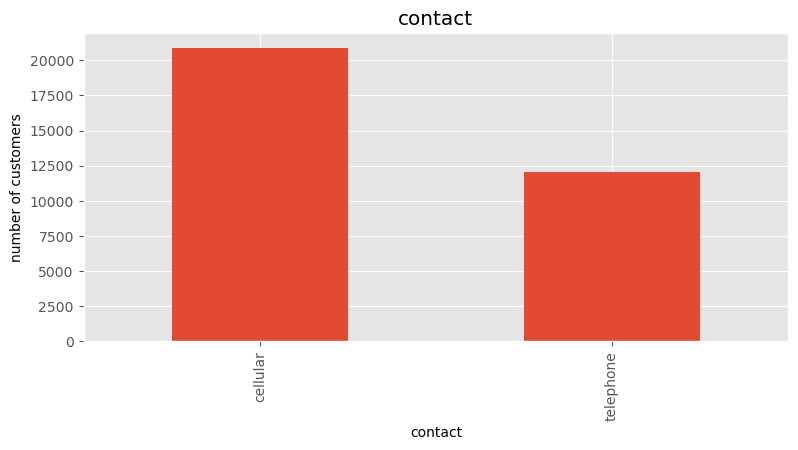

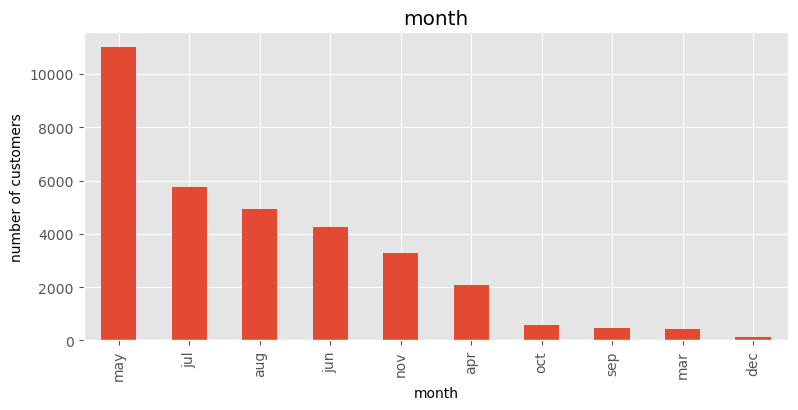

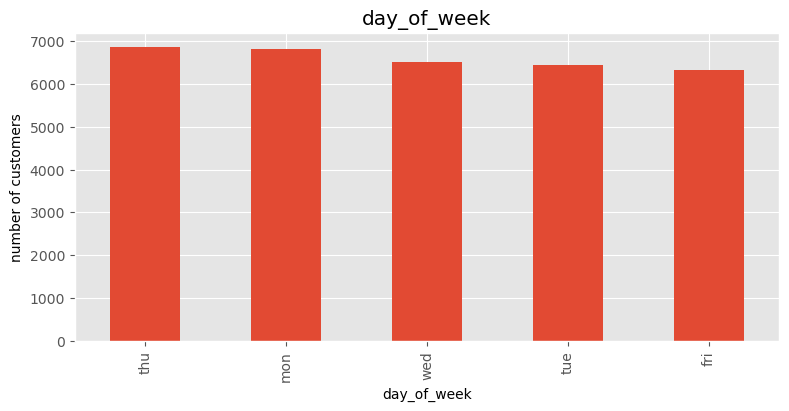

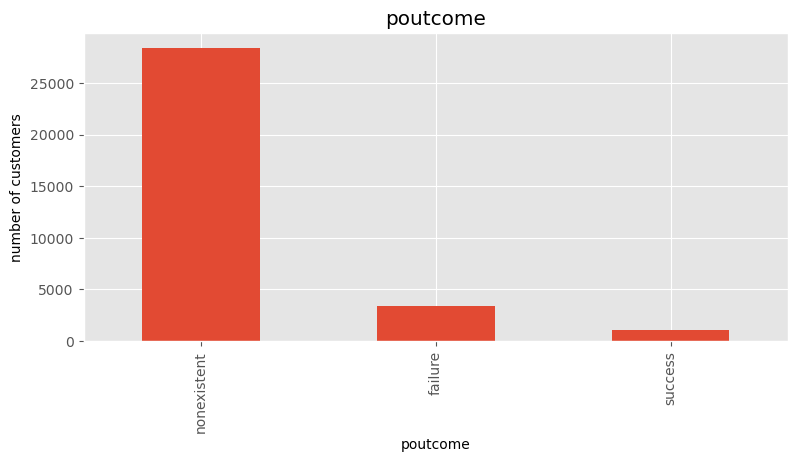

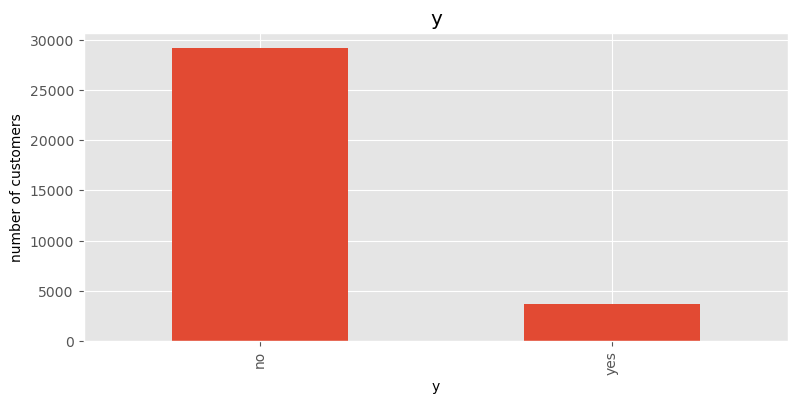

In [ ]:
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)


plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

**The missing values in some columns have been represented as unknown. unknown represents missing data.**

In [ ]:
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

**Indentifying the numerical variables**

In [ ]:
num_var= data.select_dtypes(include=np.number)
num_var.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


**Plotting histogram for each numerical variable**

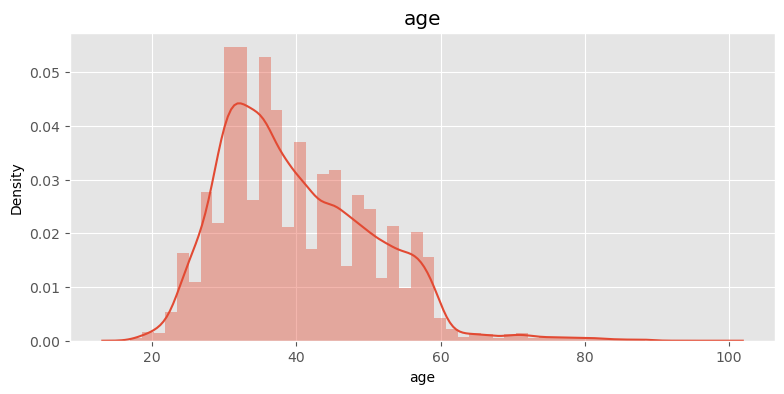

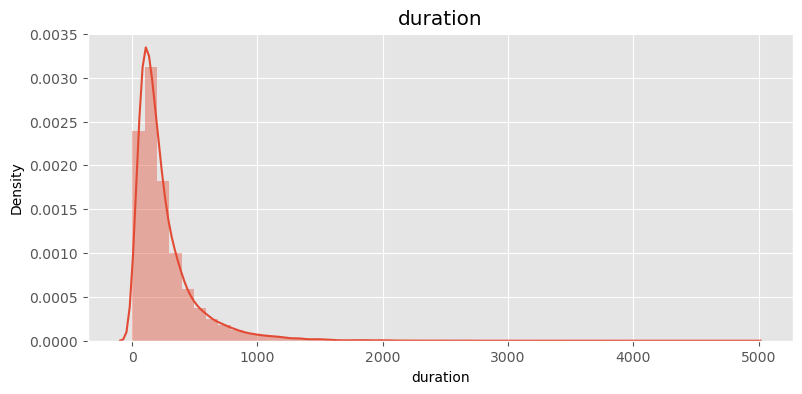

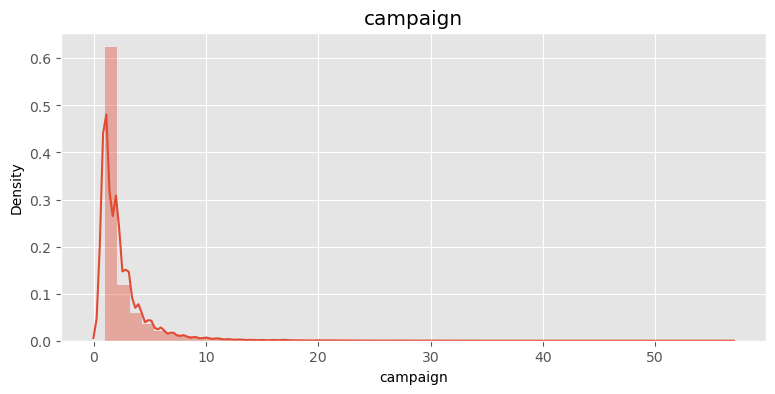

In [ ]:
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

**Bivariate Analysis of Categorical Columns**

ValueError: Cannot use `hue` without `x` and `y`

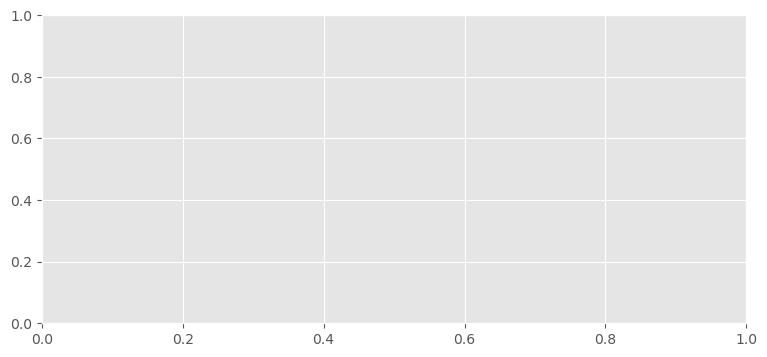

In [ ]:
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(data[column],hue=data["y"])
    plt.title(column)
    plt.xticks(rotation=90)

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
lower_boundries= []
upper_boundries= []
for i in ["age", "duration", "campaign"]:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_bound= data[i].quantile(0.25) - (1.5*IQR)
    upper_bound= data[i].quantile(0.75) + (1.5*IQR)

    print(i, ":", lower_bound, ",",  upper_bound)

    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [ ]:
lower_boundries

[9.5, -221.0, -2.0]

In [ ]:
upper_boundries

[69.5, 643.0, 6.0]

In [ ]:
j = 0
for i in ["age", "duration", "campaign"]:
    data.loc[data[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,39.929894,234.923915,2.271077,962.052413,0.174719
std,10.118566,176.854558,1.546302,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,69.000000,643.000000,6.000000,999.000000,7.000000


In [ ]:
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
for i in cat_var:
    print(i, ":", data[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for feature in cat_var:
    data[feature]= le.fit_transform(data[feature])

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,69,5,1,0,0,0,0,0,3,1,643,1,999,0,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0


In [ ]:
x= data.iloc[:, :-1]

In [ ]:
y= data.iloc[:, -1]

<Axes: >

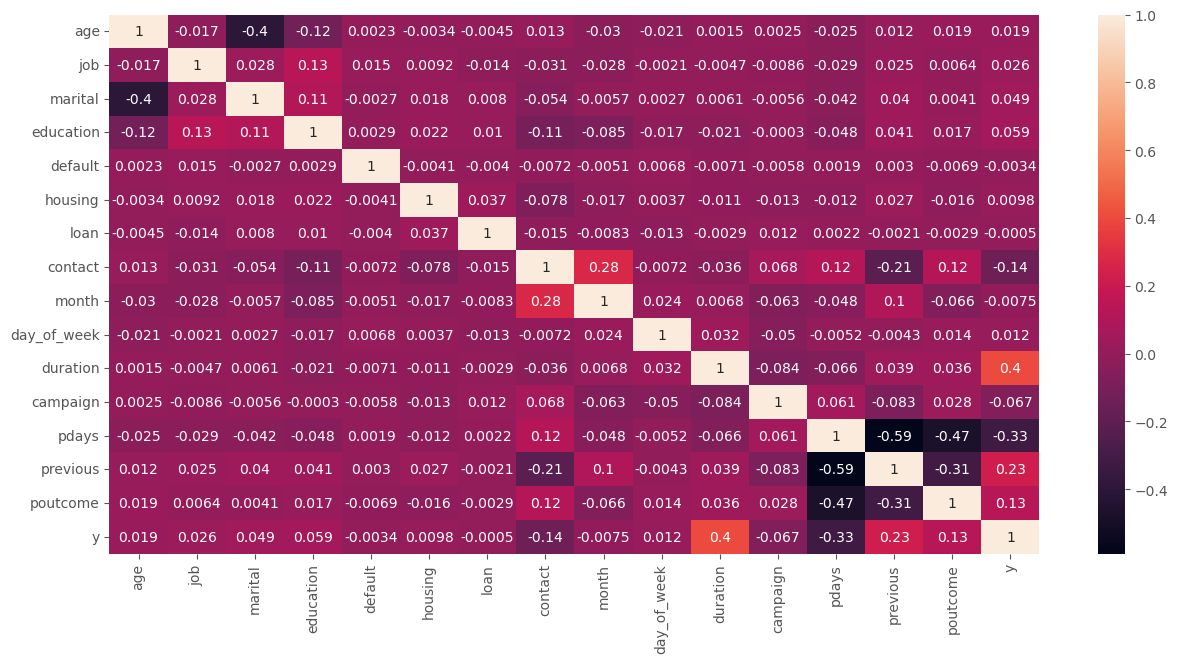

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg= LogisticRegression()

In [ ]:
x_train.shape

(26360, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Train Data")
print(accuracy_score(y_train,y_train_pred))

print("Test Data")
print(accuracy_score(y_test,y_test_pred))

Train Data
0.9019726858877086
Test Data
0.8945371775417299


In [ ]:
print("Train Data")
print(confusion_matrix(y_train,y_train_pred))

print("Test Data")
print(confusion_matrix(y_test,y_test_pred))

Train Data
[[22788   652]
 [ 1932   988]]
Test Data
[[5632  166]
 [ 529  263]]


In [ ]:
print("Train Data")
print(classification_report(y_train,y_train_pred))

print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     23440
           1       0.60      0.34      0.43      2920

    accuracy                           0.90     26360
   macro avg       0.76      0.66      0.69     26360
weighted avg       0.89      0.90      0.89     26360

Test Data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.61      0.33      0.43       792

    accuracy                           0.89      6590
   macro avg       0.76      0.65      0.69      6590
weighted avg       0.88      0.89      0.88      6590



In [ ]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_train_pred=dt.predict(x_train)
y_test_pred=dt.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23440
           1       1.00      1.00      1.00      2920

    accuracy                           1.00     26360
   macro avg       1.00      1.00      1.00     26360
weighted avg       1.00      1.00      1.00     26360

Test Data
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5798
           1       0.45      0.46      0.45       792

    accuracy                           0.87      6590
   macro avg       0.69      0.69      0.69      6590
weighted avg       0.87      0.87      0.87      6590



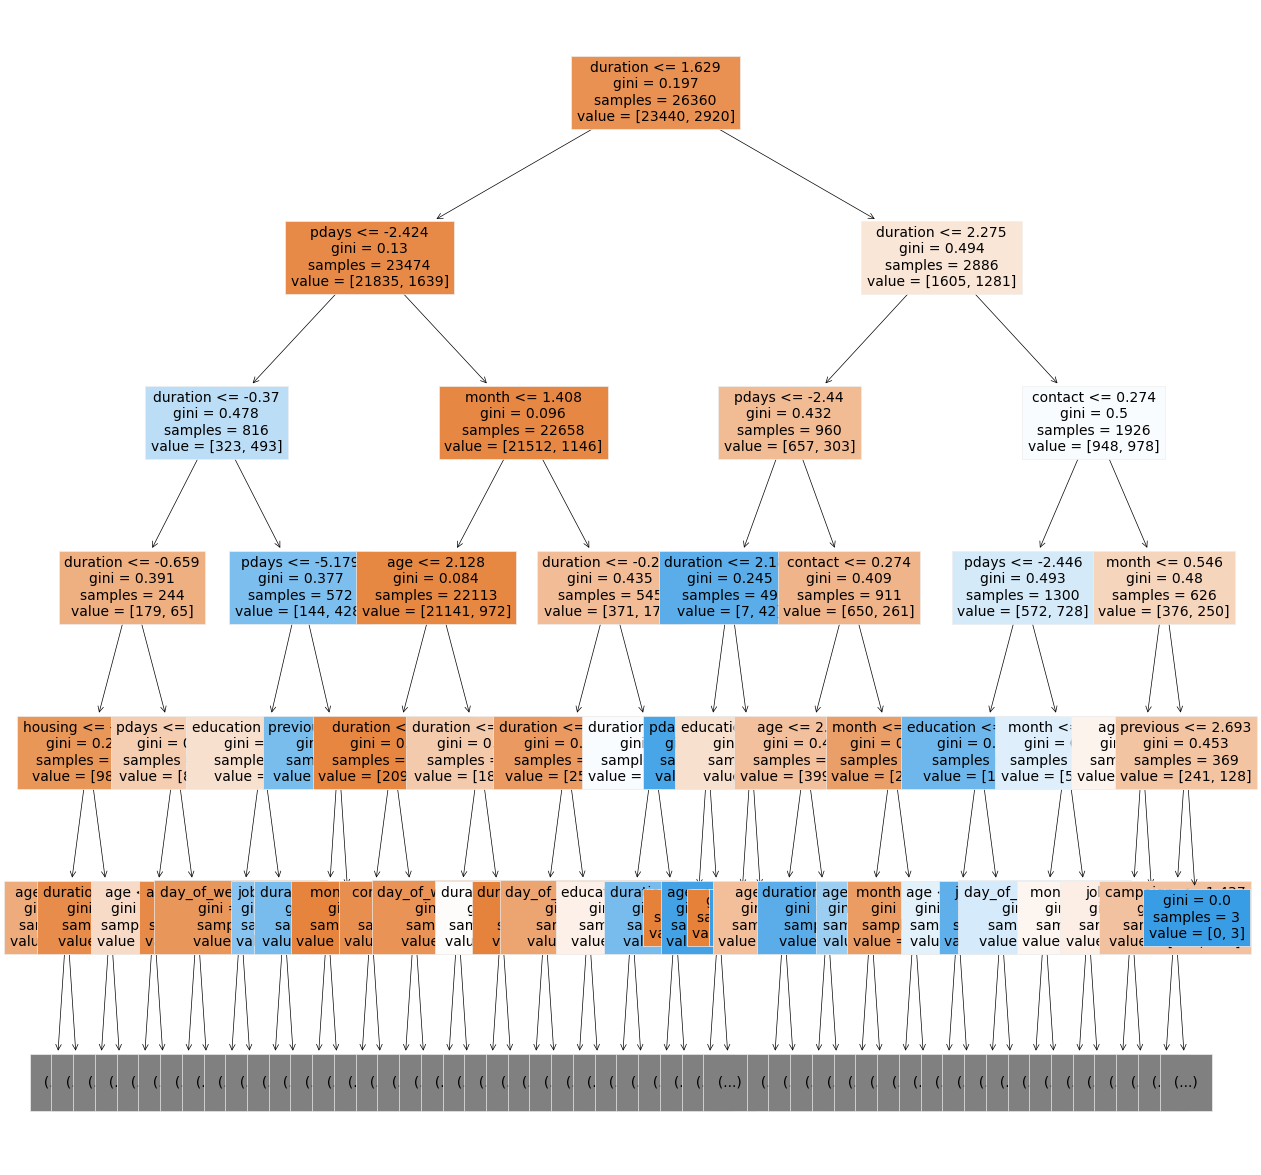

In [ ]:

fig,ax=plt.subplots(figsize=(15,15))
chart=tree.plot_tree(dt,max_depth=5,fontsize=10,feature_names=x.columns,filled=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=25,criterion="entropy",class_weight="balanced")
dt1.fit(x_train,y_train)
y_train_pred=dt1.predict(x_train)
y_test_pred=dt1.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23440
           1       0.95      1.00      0.97      2920

    accuracy                           0.99     26360
   macro avg       0.98      1.00      0.99     26360
weighted avg       0.99      0.99      0.99     26360

Test Data
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5798
           1       0.47      0.45      0.46       792

    accuracy                           0.87      6590
   macro avg       0.70      0.69      0.69      6590
weighted avg       0.87      0.87      0.87      6590



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
 param_grid={
    "max_depth":[5,10,15,20,25,30],
    "criterion":["entropy","gini"],
    "class_weight":[None,"balanced"],
    "min_samples_split":[3,6,9,12,15]
 }

In [ ]:
grid=GridSearchCV(dt,param_grid=param_grid,scoring="f1_macro",cv=3,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_split': [3, 6, 9, 12, 15]},
             scoring='f1_macro')

In [ ]:
grid.best_score_

0.7358914614259066

In [ ]:
grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 15}

In [ ]:
y_train_grid=grid.predict(x_train)
y_test_grid=grid.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("Train Data")
print(classification_report(y_train,y_train_grid))
print("Test Data")
print(classification_report(y_test,y_test_grid))

Train Data
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23440
           1       0.65      0.39      0.49      2920

    accuracy                           0.91     26360
   macro avg       0.79      0.68      0.72     26360
weighted avg       0.90      0.91      0.90     26360

Test Data
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5798
           1       0.62      0.36      0.46       792

    accuracy                           0.90      6590
   macro avg       0.77      0.67      0.70      6590
weighted avg       0.88      0.90      0.88      6590



In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM=SVC()

In [ ]:
SVM.fit(x_train,y_train)

SVC()

In [ ]:
y_train_pred=SVM.predict(x_train)
y_pred = SVM.predict(x_test)

In [ ]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_pred))

Train Data
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23440
           1       0.78      0.20      0.32      2920

    accuracy                           0.90     26360
   macro avg       0.84      0.60      0.63     26360
weighted avg       0.89      0.90      0.88     26360

Test Data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5798
           1       0.73      0.19      0.30       792

    accuracy                           0.89      6590
   macro avg       0.81      0.59      0.62      6590
weighted avg       0.88      0.89      0.87      6590



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print("Train Data")
print(f1_score(y_train,y_train_pred))
print("Test Data")
print(f1_score(y_test,y_pred))

Train Data
0.3167075497410739
Test Data
0.29889669007021064
